In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
url = '/Users/dansandler/Documents/IronHack/bootcamp/unit 5/Lab/lab-eda-univariate/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(url)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1
1) Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [4]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [9]:
top_5 = frequency_table[:5]
top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2) #Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

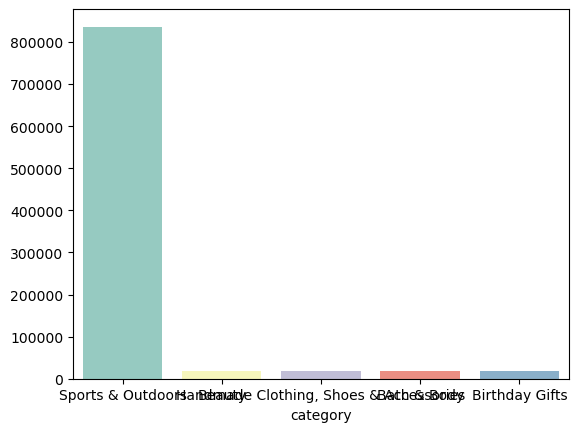

In [10]:
sns.barplot(x=top_5.index, y=top_5.values, palette="Set3");

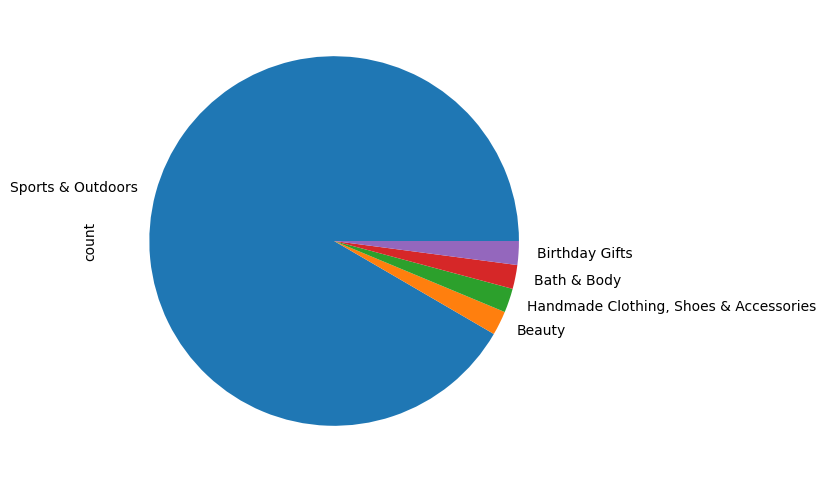

In [16]:
plot = top_5.plot.pie(y='values' , figsize=(11, 6))

# Part 2: Delving into Product Pricing

1) Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [17]:
df_aux = df

In [45]:
mean_price = df_aux['price'].mean()
median_price = df_aux['price'].median()
mode_price = df_aux['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

The average price of product are signifantly higher than than the most common price(mode).

# 2) Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [25]:
print('variance: ',df_aux['price'].var())
print('std: ',df_aux['price'].std())
print('range: ',(df_aux['price'].max()) - (df_aux['price'].min()))
print('interquantile 25%: ',df_aux['price'].quantile(0.25))
print('interquantile 50%: ',df_aux['price'].quantile(0.50))
print('interquantile 75%: ',df_aux['price'].quantile(0.75))

variance:  119445.48532256528
std:  345.60886175352226
range:  100000.0
interquantile 25%:  9.99
interquantile 50%:  19.09
interquantile 75%:  45.99


the product prices have high variance. The indicators are the variance which is 119,445, high std which is 345. 
The range which is 100,000, A very large range indicates that the product prices have extreme values (either very low or very high).

3) Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

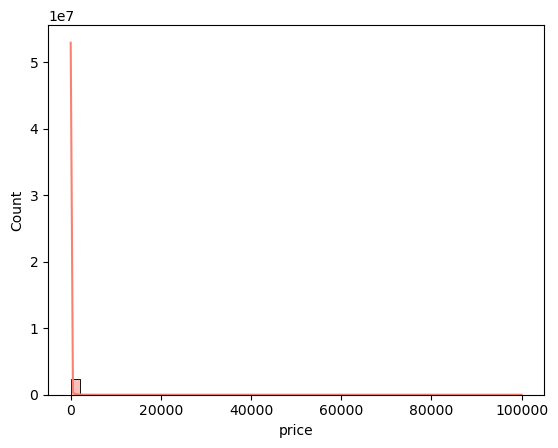

In [46]:
sns.histplot(df_aux['price'], kde=True, bins=50, color="salmon")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


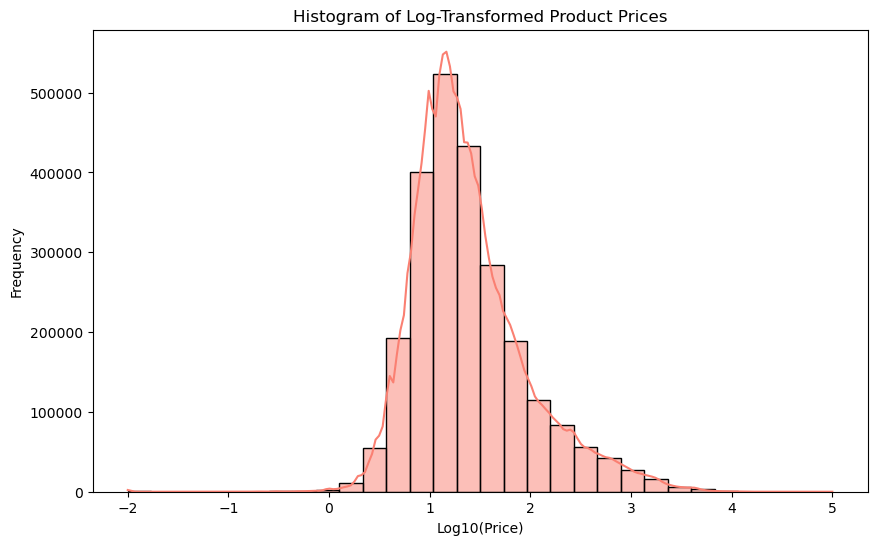

In [47]:
df['Log_Price'] = np.log10(df['price'][df['price'] > 0])  # Filter out non-positive prices

# Plot the histogram with log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df_aux['Log_Price'], kde=True, bins=30, color="salmon")
plt.title('Histogram of Log-Transformed Product Prices')
plt.xlabel('Log10(Price)')
plt.ylabel('Frequency')
plt.show()

<Axes: >

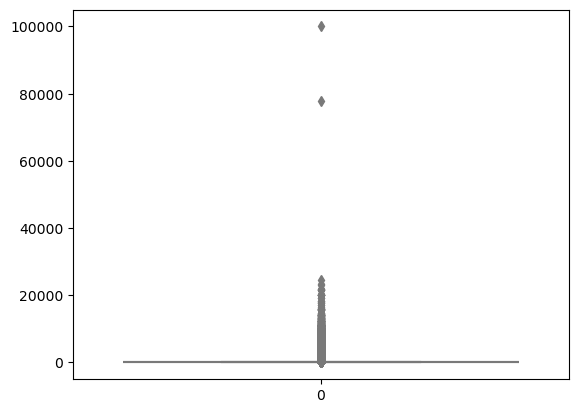

In [48]:
sns.boxplot(data = df_aux['price'], color="lightblue")

# Part 3: Unpacking Product Ratings

1) Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [50]:
mean_price = df_aux['stars'].mean()
median_price = df_aux['stars'].median()
mode_price = df_aux['stars'].mode()[0]

mean_price, median_price, mode_price

(2.152836472966065, 0.0, 0.0)

customer generally rate products 0.

2) Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [51]:
print('variance: ',df_aux['stars'].var())
print('std: ',df_aux['stars'].std())
print('range: ',(df_aux['stars'].max()) - (df_aux['stars'].min()))
print('interquantile 25%: ',df_aux['stars'].quantile(0.25))
print('interquantile 50%: ',df_aux['stars'].quantile(0.50))
print('interquantile 75%: ',df_aux['stars'].quantile(0.75))

variance:  4.81743402976196
std:  2.1948653785054697
range:  5.0
interquantile 25%:  0.0
interquantile 50%:  0.0
interquantile 75%:  4.4


There is a wide variation in customer feedback. variance:  4.82.

3) Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [53]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

the skewness is 0.0812 which is close to 0, suggesting that the distribution of product prices is approximately symmetric.
the distribution has lighter tails and is flatter (less peaked) than a normal distribution.

4) Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

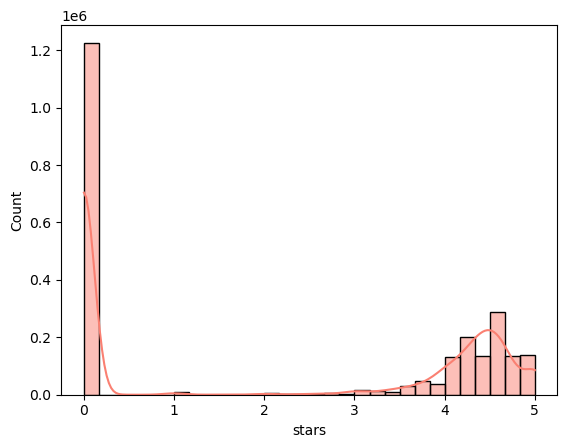

In [55]:
sns.histplot(df_aux['stars'], kde=True, bins=30, color="salmon")

0 is the most common rating.